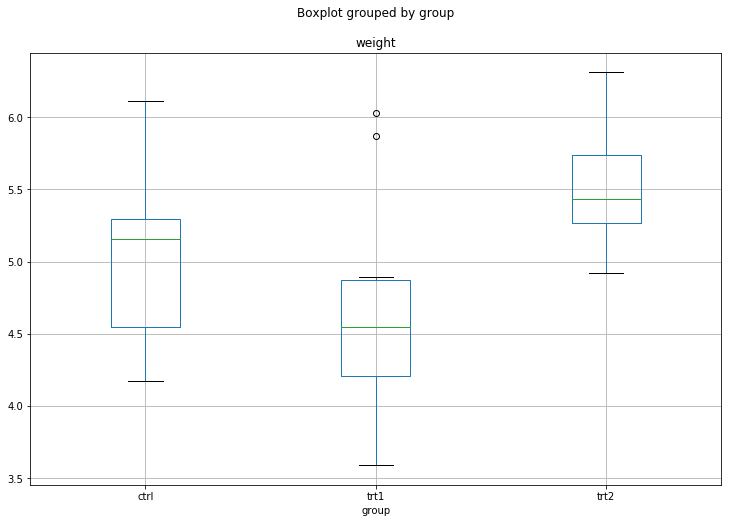

In [4]:
import pandas as pd


datafile = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv'
df = pd.read_csv(datafile)

#Create a boxplot
df.boxplot('weight', by='group', figsize=(12, 8))

ctrl = df['weight'][df.group == 'ctrl']

grps = pd.unique(df.group.values)
d_data = {grp:df['weight'][df.group == grp] for grp in grps}

k = len(pd.unique(df.group))  # number of conditions
N = len(df.values)  # conditions times participants
n = df.groupby('group').size()[0] #Participants in each condition

### Anova usig Scipy


In [7]:
from scipy import stats

F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

print(F, p)

4.846087862380136 0.0159099583256229


### Degrees of Fredoom

In [14]:
### Calculate the degrees of freedom
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

### Sum of Squares Between, WIthin, and Total

In [15]:
# Between
SSbetween = (sum(df.groupby('group').sum()['weight']**2)/n) \
    - (df['weight'].sum()**2)/N

# Within
sum_y_squared = sum([value**2 for value in df['weight'].values])
SSwithin = sum_y_squared - sum(df.groupby('group').sum()['weight']**2)/n

# Total
SStotal = sum_y_squared - (df['weight'].sum()**2)/N

### Means Square Errors and F-value

In [10]:
MSbetween = SSbetween/DFbetween
MSwithin = SSwithin/DFwithin

F = MSbetween/MSwithin

In [11]:
### Obtaining the p-value

In [12]:
p = stats.f.sf(F, DFbetween, DFwithin)

### Calculate Effect sizes: Eta Squared and Omega Squared:

In [31]:
eta_sqrd = SSbetween/SStotal
om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)

results = {'sum_sq':[SSbetween, SSwithin],
           'df':[DFbetween, DFwithin],
           'F':[F, ''],
            'PR(>F)':[p, ''],
          'EtaSq':[eta_sqrd, ''],
          'OmegaSq':[om_sqrd, '']}

aov_table1 = pd.DataFrame(results, 
                          index=['Group', 'Residual'])
    
aov_table1

,sum_sq,df,F,PR(>F),EtaSq,OmegaSq
Group,3.76634,2,4.84609,0.01591,0.264148,0.204079
Residual,10.49209,27,,,,


## Statsmodels One-Way ANOVA

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight ~ group',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


#### Calculating Eta-Squared

In [36]:
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])

aov_table['EtaSq'] = [esq_sm, 'NaN']
print(aov_table)

            sum_sq    df         F   PR(>F)     EtaSq
group      3.76634   2.0  4.846088  0.01591  0.264148
Residual  10.49209  27.0       NaN      NaN       NaN
